# Numpy - arrays, matrices, linear algebra


Last week we were working with containers:

- lists
- dicts  
- zip
- collections.Counter

---

This week we will be working with [NumPy](https://numpy.org/).

NumPy is a library for the Python, adding:  
- support for large, multi-dimensional arrays and matrices
- along with a large collection of high-level mathematical functions to operate on these arrays.

Using NumPy in Python gives functionality comparable to MATLAB.
They both allow the user to write fast programs as long as most operations work on arrays or matrices instead of scalars. 

Complementary Python packages are available: 

- [SciPy](https://www.scipy.org/) is a library that adds more MATLAB-like functionality
- [Matplotlib](https://matplotlib.org/) is a plotting package that provides MATLAB-like plotting functionality.

Internally, both MATLAB and NumPy rely on BLAS and LAPACK for efficient linear algebra computations.

---

In this notebook we:

- review the basic constructions below indexing/slicing etc
- review the operations +,* and ```np.dot(,)```
- draw some graphs
- do some basic linear algebra
- manipulate images as matrices


Later I'll show you how to use 
- [masks](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html)
- [fancy indexing](https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html)

these are **really** advanced topics.

### Important 

There is maybe one place where I use a ```for``` loop -
usually when we use ```numpy``` we try and avoid loops
because they are **slow**.


In [2]:
import numpy as np

In [6]:
X = np.arange(10)

In [5]:
type(_)

numpy.ndarray

In [21]:
X.reshape((2,5)).reshape((5,2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])


[np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

An array object represents a multidimensional, homogeneous array of fixed-size items. 
An associated data-type object describes the format of each element in the array (its byte-order, how many bytes it occupies in memory, whether it is 
- an integer
- a floating point number
- or something else (complex)

Arrays can be constructed using 

- np.array
- np.zeros/np.ones
- np.arange


In [36]:
Y = np.array([[1,2],[3,4]])
Y[:,0], Y[0,:].reshape(-1,1)

(array([1, 3]),
 array([[1],
        [2]]))

In [37]:
Y, Y.dot(_[1])

(array([[1, 2],
        [3, 4]]),
 array([[ 5],
        [11]]))

In [39]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [8]:
np.arange(10).shape

(10,)

In [10]:
np.ones(6,dtype=np.int32)

array([1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
np.ones((2,3), dtype=np.int32)

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [12]:
?np.ones

Signature: np.ones(shape, dtype=None, order='C')
Docstring:
Return a new array of given shape and type, filled with ones.

Parameters
----------
shape : int or sequence of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: C
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.

Returns
-------
out : ndarray
    Array of ones with the given shape, dtype, and order.

See Also
--------
ones_like : Return an array of ones with shape and type of input.
empty : Return a new uninitialized array.
zeros : Return a new array setting values to zero.
full : Return a new array of given shape filled with value.


Examples
--------
>>> np.ones(5)
array([1., 1., 1., 1., 1.])

>>> np.ones((5,), dtype=int)
array([1, 1, 1, 1, 1])

>>> np.ones((2, 1))
array([[1.],
    

# Reshaping

Take an array and change its dimension


In [3]:
M = np.arange(1,13); M

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
M.reshape((3,4)), M # make a 2d array

(array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

In [5]:
N = M.reshape((3,4)); N # a 2d array

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [6]:
N.reshape(12) #back to M

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [7]:
N.ravel() #works more generally - watch the videos

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [8]:
N.ravel(order='F') #fortran order - column by column

array([ 1,  5,  9,  2,  6, 10,  3,  7, 11,  4,  8, 12])

## Transpose - 1d arrays

- arr.transpose
- arr.T

In [9]:
N.transpose() 

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [10]:
N.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [11]:
np.arange(5).transpose() # doesn't work

array([0, 1, 2, 3, 4])

In [16]:
np.arange(5).reshape((5,1)) #col vector

array([[0],
       [1],
       [2],
       [3],
       [4]])

# Slices and indexing

this can be complicated

- [:] is a slice as before but it's behavior depends on the **shape**
- [i,j] will give the *ij* th element of a 2d array (matrix)
- [:,:] is a 2d slice (ie block in a matrix)

[Learn more](https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/)


In [35]:
np.arange(20)[3:-3] # one dimensional so works as with a list

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [59]:
N # but this is a 2d array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
N[:2] #first 2 rows

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [44]:
N[0,0], N[0,1], N[1,0], N[-1,-1] # some elements

(0, 1, 4, 11)

In [46]:
N[:, 1:3] #2nd and 3rd columns

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [49]:
N[1,:] #2nd row

array([4, 5, 6, 7])

In [61]:
N[:,1] #2nd col

array([1, 5, 9])

In [52]:
N[:2,:2] #2x2 block

array([[0, 1],
       [4, 5]])

In [58]:
N[1:,2:] #2x2 block

array([[ 6,  7],
       [10, 11]])

## Block assignment

In [48]:
A = np.zeros((4,4))
A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [49]:
A[:2, :2] = 1
A[2:, 2:] = 3
A[:2, 2:] = 2
A

array([[1., 1., 2., 2.],
       [1., 1., 2., 2.],
       [0., 0., 3., 3.],
       [0., 0., 3., 3.]])

## Copying values

In [42]:
B = np.ones_like(A)
B

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [43]:
B[1:,1:] = A[1:,1:]
B

array([[1., 1., 1., 1.],
       [1., 1., 2., 2.],
       [1., 0., 3., 3.],
       [1., 0., 3., 3.]])

## Row/column operations

In [52]:
A[1] = A[1] + A[2] #add rows
A

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  1., 11., 11.],
       [ 0.,  0.,  3.,  3.],
       [ 0.,  0.,  3.,  3.]])

In [58]:
A[:,0] *= 2 #multiply column by scalar
A

array([[64.,  1.,  2.,  2.],
       [64.,  1., 11., 11.],
       [ 0.,  0.,  3.,  3.],
       [ 0.,  0.,  3.,  3.]])

# Arithemetic in general

In [66]:
N

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [68]:
2*N # scalar multiplication

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [78]:
np.ones_like(N) 

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [77]:
N + np.ones_like(N) #addition

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## A trick

This uses an advanced trick called 
[broadcasting](https://numpy.org/doc/stable/reference/generated/numpy.broadcast.html)
to do the same thing.

Basically the 1 is automatically converted to ```np.ones_like(N)```

In [79]:
N + 1

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## More addition

In [76]:
N[:,:-1] + np.identity(3) 

array([[ 1.,  1.,  2.],
       [ 4.,  6.,  6.],
       [ 8.,  9., 11.]])

## Multiplication, applying functions

- (*) is element by element
- f() is element by element

In [83]:
N

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [82]:
N*N

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [85]:
np.sqrt(N*N)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [87]:
np.sqrt(np.arange(10))

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [61]:
def f(x):
    return np.log(2*x + 1)

In [62]:
f(np.arange(10))

array([0.        , 1.09861229, 1.60943791, 1.94591015, 2.19722458,
       2.39789527, 2.56494936, 2.7080502 , 2.83321334, 2.94443898])

# Speed comparison

https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-timeit

In [63]:
%%timeit
f(np.arange(1000))

26.4 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [64]:
%%timeit
[f(x) for x in np.arange(1000)]

2.23 ms ± 76.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
g = np.vectorize(f)

In [66]:
%%timeit
g(np.arange(1000))

1.18 ms ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Scalar product

Remember:
$ v.v = \| v\|^2$

In [143]:
v = np.arange(5)
v

array([0, 1, 2, 3, 4])

In [144]:
np.dot(v,v)

30

In [146]:
np.linalg.norm(v) ** 2

30.0

In [147]:
np.dot(v, np.ones_like(v))

10

In [148]:
np.sum(v)

10

## Matrix x vector, Matrix x Matrix

In [155]:
R = np.ones((2,2))
R[0,1] *= -1
R

array([[ 1., -1.],
       [ 1.,  1.]])

In [160]:
np.dot(R, np.array([1,0])), np.dot(R, np.array([0,1])) 

(array([1., 1.]), array([-1.,  1.]))

In [161]:
np.dot(R, R)

array([[ 0., -2.],
       [ 2.,  0.]])

## Graphs

we'll use [matplotlib](https://matplotlib.org/)
to draw some graphs.

Matplotlib can be **very** complicated 
so we'll study it properly next week.

In [67]:
import matplotlib.pyplot as plt
import numpy as np

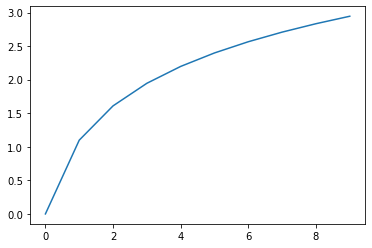

In [68]:
plt.plot(f(np.arange(10)) )

In [70]:
T = np.linspace(0, 2*np.pi, 20)
T

array([0.        , 0.33069396, 0.66138793, 0.99208189, 1.32277585,
       1.65346982, 1.98416378, 2.31485774, 2.64555171, 2.97624567,
       3.30693964, 3.6376336 , 3.96832756, 4.29902153, 4.62971549,
       4.96040945, 5.29110342, 5.62179738, 5.95249134, 6.28318531])

In [7]:
? np.linspace

Signature: np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
num : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.
endpoint : bool, optional
    If True, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
retstep : bool, optional
    If True, ret

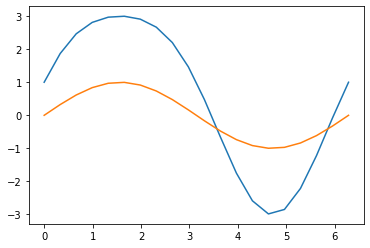

In [81]:
Y = np.sin(T)
X = np.cos(T)
plt.plot(T,X*X + 3*Y)
plt.plot(T,Y);

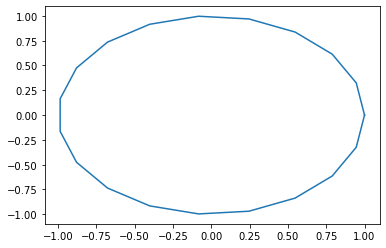

In [82]:
plt.plot(X,Y);

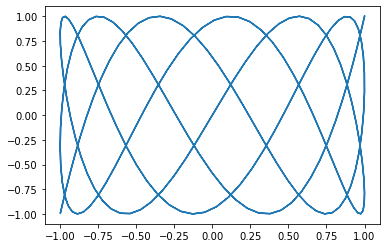

In [83]:
S = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(5*S), np.cos(13*S));

## Basic linear algebra

- linear systems
- eigenvectors, eigenvalues

### Linear systems

Solve 
$M.X = Y$


- np.linalg.solve
- $X = M^{-1}Y$

In [53]:
M = np.identity(3)
M[0] = np.arange(1,4)
M[1,2] = 4
M

array([[1., 2., 3.],
       [0., 1., 4.],
       [0., 0., 1.]])

In [54]:
np.linalg.det(M)

1.0

In [55]:
np.linalg.inv(M)

array([[ 1., -2.,  5.],
       [ 0.,  1., -4.],
       [ 0.,  0.,  1.]])

In [57]:
np.dot(M,_)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [59]:
np.linalg.solve(M, np.ones(3))

array([ 4., -3.,  1.])

In [60]:
np.dot(M, _)

array([1., 1., 1.])

In [61]:
np.dot(np.linalg.inv(M), np.ones(3))

array([ 4., -3.,  1.])

### Eigenvalues, eigenvectors

In [17]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [18]:
np.linalg.det(A)

0.0

In [19]:
A[0] - 2* A[1]  + A[2]

array([0, 0, 0])

In [20]:
vps, basis = np.linalg.eig(A)

In [22]:
vps #eigenvalues

array([ 1.33484692e+01, -1.34846923e+00, -2.48477279e-16])

### 3rd eigenvalue is nearly 0

In [67]:
vps[2]

-2.484772788451793e-16

In [23]:
basis 

array([[ 0.16476382,  0.79969966,  0.40824829],
       [ 0.50577448,  0.10420579, -0.81649658],
       [ 0.84678513, -0.59128809,  0.40824829]])

In [25]:
np.dot(A, basis)

array([[ 2.19934474e+00, -1.07837039e+00, -3.33066907e-16],
       [ 6.75131503e+00, -1.40518298e-01, -8.88178420e-16],
       [ 1.13032853e+01,  7.97333791e-01, -1.33226763e-15]])

## Kernel

the third column of the basis is in the kernel

In [24]:
np.dot(A, basis[:,2])

array([-3.33066907e-16, -4.44089210e-16, -8.88178420e-16])

In [25]:
basis[:,2]/basis[0,2]

array([ 1., -2.,  1.])

In [70]:
A[0] - 2* A[1]  + A[2]

array([0, 0, 0])

## Calculate the eigenvalues

from the characteristic polynomial

$$t \times(t^2 -12t -18)$$

In [26]:
np.poly(A).astype(np.int32) # coeficients of characteristic polynomial

array([  1, -12, -18,   0], dtype=int32)

### Use the quadratic formula

In [45]:
disc = np.sqrt(12**2 + 4*18)
disc, 6*np.sqrt(6)

(14.696938456699069, 14.696938456699067)

In [37]:
(12 + disc )/2, (12 - disc )/2

(13.348469228349535, -1.3484692283495345)

## Exercises

- create a list of 3x3 matrices with random integer coefficients
- what is the probability that such a matrix is invertible if the coefficients are 0 and 1 ?
- use ```np.linalg.eigvals``` to find the biggest eigenvalue for the matrices

---

- make a [van der monde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix)
with first row a random list of 5 real numbers
- calculate its determinant and verify the formula




In [120]:
import random

from numpy.linalg import det
from numpy.random import randint
from numpy.linalg import eigvals

#? np.random.randint


X = [ 1   for k in range(100000) if abs(det( randint(0,2,9).reshape(3,3))) < .5 ]

len(X)

66019

In [161]:
eigvals( 2*np.random.rand(2,2) -1)

array([0.22865269+0.20750086j, 0.22865269-0.20750086j])

In [117]:
? np.linalg.eigvals

Signature:  np.linalg.eigvals(a)
Docstring:
Compute the eigenvalues of a general matrix.

Main difference between `eigvals` and `eig`: the eigenvectors aren't
returned.

Parameters
----------
a : (..., M, M) array_like
    A complex- or real-valued matrix whose eigenvalues will be computed.

Returns
-------
w : (..., M,) ndarray
    The eigenvalues, each repeated according to its multiplicity.
    They are not necessarily ordered, nor are they necessarily
    real for real matrices.

Raises
------
LinAlgError
    If the eigenvalue computation does not converge.

See Also
--------
eig : eigenvalues and right eigenvectors of general arrays
eigvalsh : eigenvalues of real symmetric or complex Hermitian
           (conjugate symmetric) arrays.
eigh : eigenvalues and eigenvectors of real symmetric or complex
       Hermitian (conjugate symmetric) arrays.

Notes
-----

.. versionadded:: 1.8.0

Broadcasting rules apply, see the `numpy.linalg` documentation for
details.

This is implemented usi

# Advanced - images as arrays

Images can be manipulated like matrix.
I learned [how to here](https://scipy-lectures.org/advanced/image_processing/).




You can use any image you like 
but please start by dowloading 
[this one](https://macbuse.github.io/PROG/anonymous.png)

<img src="https://macbuse.github.io/PROG/anonymous.png" width="250">




In [169]:
import imageio
import matplotlib.pyplot as plt


In [171]:
im = imageio.imread('https://macbuse.github.io/PROG/anonymous.png')

In [176]:
im.max()

255

In [173]:
im.shape

(769, 556)

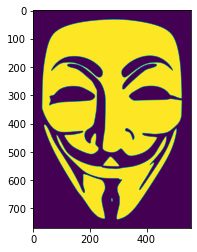

In [175]:
plt.imshow(im);

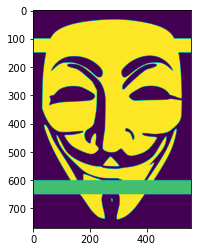

In [179]:
im[100:150,:] = 255
im[600:650,:] = 178
plt.imshow(im)

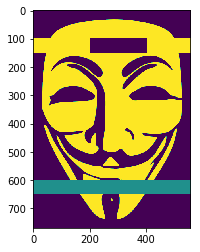

In [37]:
im[100:150,200:400] = 0 
plt.imshow(im);

## Convert to a color image

color images are 3 layers

- R = red
- G = green
- B = blue

each layer is a 2x2 matrix of floats between 0 and 1



In [38]:
col_im = np.stack((im.T/255.,)*3).T #duplicate the layer and convert to floats

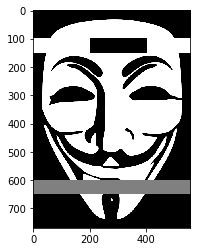

In [40]:
plt.imshow(col_im);

In [172]:
R,G,B = col_im.T

In [173]:
G *= 0
B *= 0

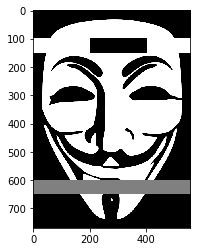

In [88]:
plt.imshow(col_im);

## It's better to make a copy

In [177]:
col_im = np.stack((im.T/255.,)*3).T #duplicate the layer and convert to floats

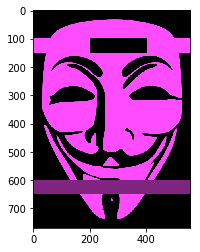

In [87]:
R,G,B = np.copy(col_im).T
G *= .3

plt.imshow(np.stack((R,G,B)).T);

## Resizing an image using strides

you can resize (resample) an image  but you should really  use
[scipy.transform.resize](https://scikit-image.org/docs/dev/api/skimage.transform.html)




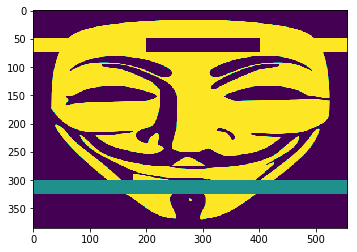

In [83]:
plt.imshow(im[::2,:])

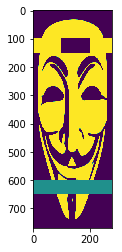

In [198]:
plt.imshow(im[:,::2])

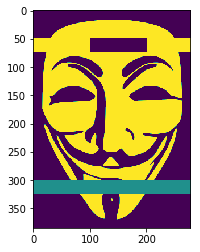

In [84]:
plt.imshow(im[::2,::2])

## of course

there are a lot of other things you can do

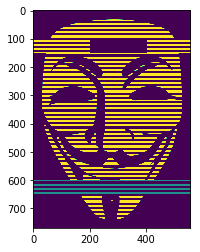

In [86]:
xx = np.copy(im)
xx[::2,:] = 0
plt.imshow(xx);

## duplicate the image à la Warhol

<img src="https://311704-954623-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2019/05/Marilyn-Suite-1024x1024.jpg" width="250">

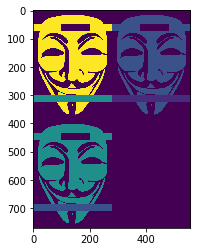

In [101]:
yy = im[::2,::2]
dy, dx = yy.shape

pp = np.zeros((2*dy,2*dx), dtype=np.uint8)

pp[:dy,:dx] = yy
pp[:dy,dx:] = yy//4
pp[dy:,:dx] = yy//2

plt.imshow(pp);

## In the video he uses concatenate

rather than writing **blocks**

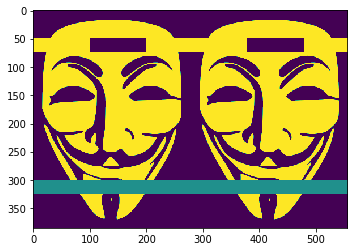

In [59]:
plt.imshow(np.concatenate((yy,yy), axis=1 ));

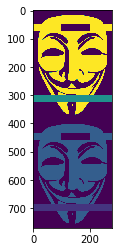

In [73]:
plt.imshow(np.concatenate((yy, .3*yy), axis=0 ));

In [80]:
tmp = np.concatenate((yy,.5*yy,.25*yy), axis = 1)

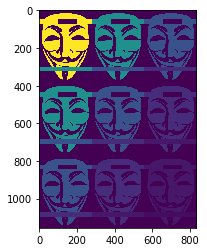

In [82]:
plt.imshow( np.concatenate((tmp,.5*tmp,.25*tmp))); 

### Exercises

- make Marilyn more interesting by changing colors
- reverse (reflect) an image vertically/horizontally
- make an image with stripes or a gradient

<img src="./strip.jpg" width="200">
<img src="./grad.jpg" width="200">

In [89]:
mary = imageio.imread('./marilyn.jpg')

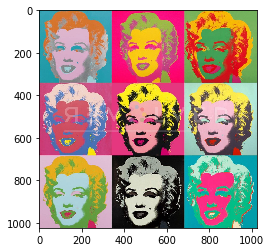

In [91]:
plt.imshow(mary);

In [92]:
mary.shape

(1024, 1024, 3)

In [96]:
sx = 1024//3

In [106]:
mm = mary[sx:2*sx,sx:2*sx]

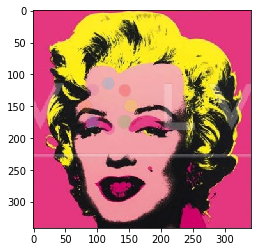

In [107]:
plt.imshow(mm);

In [108]:
xx = np.ones_like(mm)

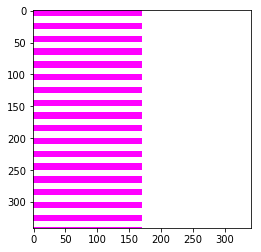

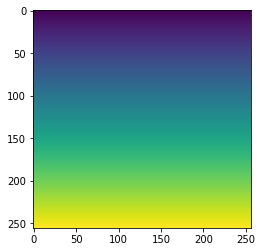